In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install pandas

  Using cached pandas-2.3.2-cp311-cp311-win_amd64.whl (11.3 MB)



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
!pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 17.3 MB/s eta 0:00:00
     ------------------------------------- 225.2/225.2 kB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 48.2 MB/s eta 0:00:00
     ---------------------------------------- 73.8/73.8 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 44.7 MB/s eta 0:00:00
     -------------------------------------- 113.9/113.9 kB 6.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
experimento ={
    'sujeto':['S01','S02','S03','S02','S01','S01','S02'],
    'sabor':['choco','piñon','queso','chango','choco','queso','angel'],
    'precio':[45,105,30,60,85,45,120],
    'tamaño':['m','g','ch','ch','g','m','g']
}
experimento

{'sujeto': ['S01', 'S02', 'S03', 'S02', 'S01', 'S01', 'S02'],
 'sabor': ['choco', 'piñon', 'queso', 'chango', 'choco', 'queso', 'angel'],
 'precio': [45, 105, 30, 60, 85, 45, 120],
 'tamaño': ['m', 'g', 'ch', 'ch', 'g', 'm', 'g']}

In [7]:
df=pd.DataFrame(experimento)
df

,sujeto,sabor,precio,tamaño
0,S01,choco,45,m
1,S02,piñon,105,g
2,S03,queso,30,ch
3,S02,chango,60,ch
4,S01,choco,85,g
5,S01,queso,45,m
6,S02,angel,120,g


In [9]:
df['activación']= [True, True, False, False, True, True, False]
df

,sujeto,sabor,precio,tamaño,columna,activación
0,S01,choco,45,m,nose,True
1,S02,piñon,105,g,nose,True
2,S03,queso,30,ch,nose,False
3,S02,chango,60,ch,nose,False
4,S01,choco,85,g,nose,True
5,S01,queso,45,m,nose,True
6,S02,angel,120,g,nose,False


In [11]:
df.sujeto

0    S01
1    S02
2    S03
3    S02
4    S01
5    S01
6    S02
Name: sujeto, dtype: object

In [14]:
df[df['sujeto']=='S01'] #FILTRADO DEL SUJETO 1

,sujeto,sabor,precio,tamaño,columna,activación
0,S01,choco,45,m,nose,True
4,S01,choco,85,g,nose,True
5,S01,queso,45,m,nose,True


In [15]:
df[df['sujeto']=='S02']

,sujeto,sabor,precio,tamaño,columna,activación
1,S02,piñon,105,g,nose,True
3,S02,chango,60,ch,nose,False
6,S02,angel,120,g,nose,False


In [16]:
df[df['sujeto']=='S03']

,sujeto,sabor,precio,tamaño,columna,activación
2,S03,queso,30,ch,nose,False


In [20]:
df.groupby(by='sujeto')

In [24]:
df_por_sujeto=df.groupby(by='sujeto')
df_por_sujeto.describe() #describir estadisticamente

precio                                                       
        count       mean        std   min   25%    50%    75%    max
sujeto                                                              
S01       3.0  58.333333  23.094011  45.0  45.0   45.0   65.0   85.0
S02       3.0  95.000000  31.224990  60.0  82.5  105.0  112.5  120.0
S03       1.0  30.000000        NaN  30.0  30.0   30.0   30.0   30.0

In [25]:
df_por_sujeto.describe(include='all') #considerar strings y numeros

sabor                                                   ... activación  \
       count unique    top freq mean  std  min  25%  50%  75%  ...     unique   
sujeto                                                         ...              
S01        3      2  choco    2  NaN  NaN  NaN  NaN  NaN  NaN  ...          1   
S02        3      3  piñon    1  NaN  NaN  NaN  NaN  NaN  NaN  ...          2   
S03        1      1  queso    1  NaN  NaN  NaN  NaN  NaN  NaN  ...          1   

                                                       
          top freq mean  std  min  25%  50%  75%  max  
sujeto                                                 
S01      True    3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
S02     False    2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
S03     False    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 55 columns]

In [27]:
df.describe(include='all')

,sujeto,sabor,precio,tamaño,columna,activación
count,7,7,7.00000,7,7,7
unique,3,5,NaN,3,1,2
top,S01,choco,NaN,g,nose,True
freq,3,2,NaN,3,7,4
mean,NaN,NaN,70.00000,NaN,NaN,NaN
std,NaN,NaN,33.91165,NaN,NaN,NaN
min,NaN,NaN,30.00000,NaN,NaN,NaN
25%,NaN,NaN,45.00000,NaN,NaN,NaN
50%,NaN,NaN,60.00000,NaN,NaN,NaN
75%,NaN,NaN,95.00000,NaN,NaN,NaN


In [6]:
tipos_sujetos= ['S'+str(i).zfill(2) for i in range(4)]
generos=['M','F']
condicion=['control','experimental']
region=['hipocampo','cortex prefrontal','amigdala']
neurotransmisor=['dopamina','serotonina']

#crear dataframe de 200 filas
# con las columnas de arriba
# con distribución uniforme
# agregar columna llamada precision que tenga una distribución normal con mu=0.92, sigma=0.08
#Este dataset pretende simular los resultados de un estidio en el que se miden variables cognitivas
# y fisiológicas en diferentes regiones cerebrales, sujetos y condiciones experimental

mu=0.92
sigma=0.08
precision= np.random.normal(mu,sigma,200)
enteros=np.random.randint(0,4,size=200)
sujetos=['S'+str(i).zfill(2) for i in enteros]


In [7]:
ops_sujetos= np.random.randint(len(tipos_sujetos),size=200)
sujetos2=[tipos_sujetos[i] for i in ops_sujetos]

In [8]:
ops_gens=np.random.randint(len(generos),size=200)
lista_generos=[generos[i] for i in ops_gens]

In [16]:
ops_condicion=np.random.randint(len(condicion),size=200)
lista_condicion=[condicion[i] for i in ops_condicion]

ops_region=np.random.randint(len(region),size=200)
lista_region=[region[i] for i in ops_region]

ops_nt=np.random.randint(len(neurotransmisor),size=200)
lista_nt=[neurotransmisor[i] for i in ops_nt]


df=pd.DataFrame({
    'Sujetos': sujetos2,
    'Género': lista_generos,
    'Condición': lista_condicion,
    'Región': lista_region,
    'Neurotransmisor': lista_nt
})
df

,Sujetos,Género,Condición,Región,Neurotransmisor
0,S00,M,experimental,hipocampo,dopamina
1,S01,M,control,hipocampo,serotonina
2,S02,F,experimental,hipocampo,serotonina
3,S01,M,experimental,cortex prefrontal,serotonina
4,S03,M,experimental,amigdala,serotonina
...,...,...,...,...,...
195,S02,F,control,amigdala,dopamina
196,S03,M,experimental,hipocampo,serotonina
197,S00,F,experimental,cortex prefrontal,dopamina
198,S03,F,control,hipocampo,dopamina


In [41]:
g_ops= np.random.choice(generos,200)
condicion_n=np.random.choice(condicion,200)
region_n=np.random.choice(region,200)
nt_n=np.random.choice(neurotrnasmisor,200)


array(['hipocampo', 'hipocampo', 'hipocampo', 'amigdala',
       'cortex prefrontal', 'hipocampo', 'hipocampo', 'hipocampo',
       'hipocampo', 'amigdala'], dtype='<U17')

In [ ]:
ops_genero=np.random.randint(len(generos),size=200)
for x in ops_genero:
    if x ==0:
        gen.append('M')
    else:
        gen.append('F')

In [17]:
df['precision']=precision
df

,Sujetos,Género,Condición,Región,Neurotransmisor,precision
0,S00,M,experimental,hipocampo,dopamina,0.812196
1,S01,M,control,hipocampo,serotonina,0.978135
2,S02,F,experimental,hipocampo,serotonina,0.889813
3,S01,M,experimental,cortex prefrontal,serotonina,0.989743
4,S03,M,experimental,amigdala,serotonina,0.854904
...,...,...,...,...,...,...
195,S02,F,control,amigdala,dopamina,0.890428
196,S03,M,experimental,hipocampo,serotonina,0.979451
197,S00,F,experimental,cortex prefrontal,dopamina,0.941846
198,S03,F,control,hipocampo,dopamina,0.875917


In [24]:
#generar el histograma de cuantos datos por sujeto se tienen
# mostrar en un histograma la proporción de neurotransmisor
df.count(axis=1)

0      6
1      6
2      6
3      6
4      6
      ..
195    6
196    6
197    6
198    6
199    6
Length: 200, dtype: int64

In [42]:
df_nums=df.value_counts('Sujetos')
df_nums

Sujetos
S01    60
S02    51
S03    47
S00    42
Name: count, dtype: int64

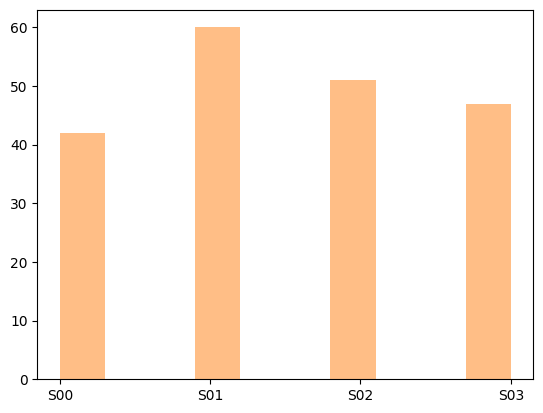

In [45]:
plt.hist(df.Sujetos,color='tab:orange',alpha=0.5);

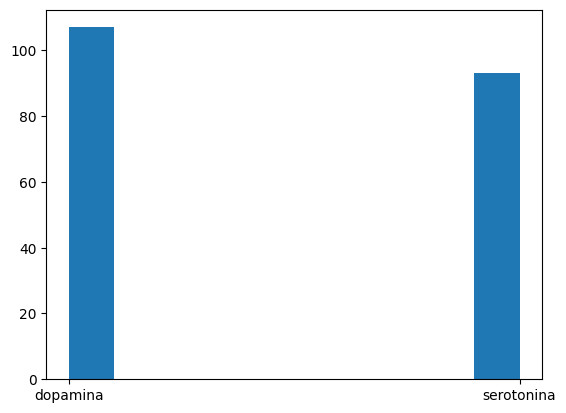

In [47]:
plt.hist(df.Neurotransmisor);

In [50]:
# para cada sujeto, sacar la proporción del tipo de condición
#para cada sujeto, calcular el maximo, el minimo y la media de su precisión
# para cada condición, hacer histograma de las regiones aactivadas(helados)
#hacerlo por filtrado de dataframes y usando groupby
df_por_sujeto=df.groupby(by='Sujetos')
df_por_sujeto.value_counts(df.Condición)

ValueError: Keys {'experimental', 'control'} in subset do not exist in the DataFrame.